### Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Data Understanding and preperation

In [4]:
crime_data['Unnamed: 0'].nunique()

50

In [5]:
crime_df = crime_data.copy()
del crime_df['Unnamed: 0']

In [6]:
crime_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
std_scale = StandardScaler()
crime_scale_data = std_scale.fit_transform(crime_df)
crime_scale_data = pd.DataFrame(data = crime_scale_data, columns=crime_df.columns)
crime_scale_data


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## Modeling

### using DBSCAN

In [8]:
db_cluster = DBSCAN(min_samples=4, eps = 1)
crime_data['cluster_db'] = db_cluster.fit_predict(crime_scale_data)
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


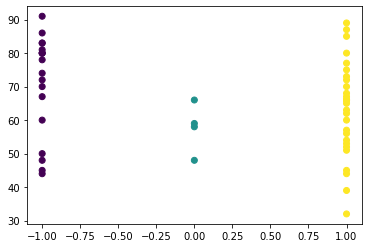

In [9]:
plt.scatter(crime_data['cluster_db'],crime_data['UrbanPop'], c=crime_data['cluster_db']) 
plt.show()

### using Hierarichal

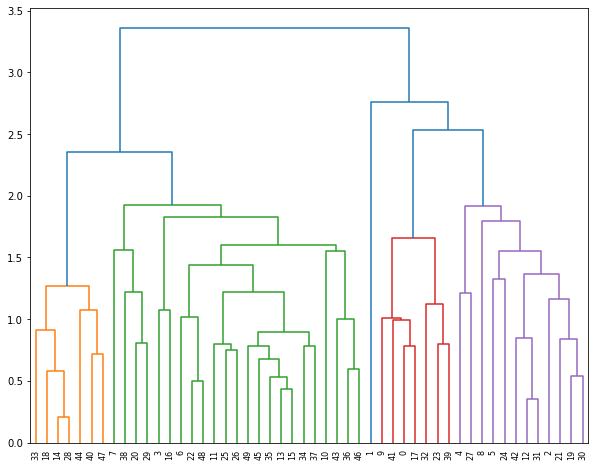

In [10]:
plt.figure(figsize=(10,8))
dendogram = sch.dendrogram(sch.linkage(crime_scale_data,'average'))

In [11]:
hc_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean')
cluster_hc = hc_cluster.fit_predict(crime_scale_data)
crime_data['cluster_hc'] = cluster_hc
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,0
2,Arizona,8.1,294,80,31.0,-1,0
3,Arkansas,8.8,190,50,19.5,-1,1
4,California,9.0,276,91,40.6,-1,0
5,Colorado,7.9,204,78,38.7,-1,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,-1,1
8,Florida,15.4,335,80,31.9,-1,0
9,Georgia,17.4,211,60,25.8,-1,0


In [12]:
crime_data.cluster_hc.value_counts()

0    19
1    19
2    12
Name: cluster_hc, dtype: int64

In [13]:
crime_data[crime_data['cluster_hc'] == 0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,0
2,Arizona,8.1,294,80,31.0,-1,0
4,California,9.0,276,91,40.6,-1,0
5,Colorado,7.9,204,78,38.7,-1,0
8,Florida,15.4,335,80,31.9,-1,0
9,Georgia,17.4,211,60,25.8,-1,0
12,Illinois,10.4,249,83,24.0,-1,0
17,Louisiana,15.4,249,66,22.2,0,0
19,Maryland,11.3,300,67,27.8,-1,0


In [14]:
crime_data[crime_data['cluster_hc'] == 1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc
3,Arkansas,8.8,190,50,19.5,-1,1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,-1,1
10,Hawaii,5.3,46,83,20.2,-1,1
13,Indiana,7.2,113,65,21.0,1,1
15,Kansas,6.0,115,66,18.0,1,1
16,Kentucky,9.7,109,52,16.3,1,1
20,Massachusetts,4.4,149,85,16.3,1,1
24,Missouri,9.0,178,70,28.2,1,1
29,New Jersey,7.4,159,89,18.8,1,1


In [15]:
crime_data[crime_data['cluster_hc'] == 2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc
11,Idaho,2.6,120,54,14.2,1,2
14,Iowa,2.2,56,57,11.3,1,2
18,Maine,2.1,83,51,7.8,1,2
22,Minnesota,2.7,72,66,14.9,1,2
25,Montana,6.0,109,53,16.4,1,2
26,Nebraska,4.3,102,62,16.5,1,2
28,New Hampshire,2.1,57,56,9.5,1,2
33,North Dakota,0.8,45,44,7.3,1,2
40,South Dakota,3.8,86,45,12.8,1,2
44,Vermont,2.2,48,32,11.2,1,2


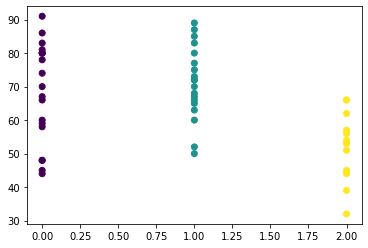

In [31]:
plt.scatter(crime_data.cluster_hc,crime_data.UrbanPop,c = crime_data.cluster_hc)
plt.show()

### use Kmean

In [16]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(crime_scale_data)
    wcss.append(kmean.inertia_)

In [17]:
wcss

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 49.96920284452793,
 43.85386842769549,
 39.159790333086974,
 36.61029240009752,
 30.707105292606716,
 28.638532838074482]

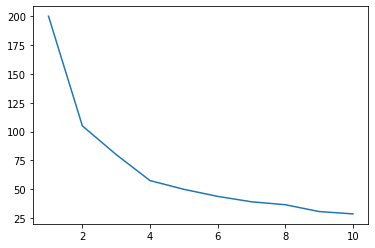

In [18]:
plt.plot(range(1,11),wcss)
plt.show()

#### K = 4

In [19]:
kmean_cluster = KMeans(n_clusters=4)
cluster_k = kmean_cluster.fit_predict(crime_scale_data)
crime_data['cluster_km'] = cluster_k
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc,cluster_km
0,Alabama,13.2,236,58,21.2,0,0,2
1,Alaska,10.0,263,48,44.5,-1,0,3
2,Arizona,8.1,294,80,31.0,-1,0,3
3,Arkansas,8.8,190,50,19.5,-1,1,2
4,California,9.0,276,91,40.6,-1,0,3
5,Colorado,7.9,204,78,38.7,-1,0,3
6,Connecticut,3.3,110,77,11.1,1,1,1
7,Delaware,5.9,238,72,15.8,-1,1,1
8,Florida,15.4,335,80,31.9,-1,0,3
9,Georgia,17.4,211,60,25.8,-1,0,2


In [20]:
crime_data.cluster_km.value_counts()

1    16
0    13
3    13
2     8
Name: cluster_km, dtype: int64

In [22]:
crime_data[crime_data.cluster_km == 1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc,cluster_km
6,Connecticut,3.3,110,77,11.1,1,1,1
7,Delaware,5.9,238,72,15.8,-1,1,1
10,Hawaii,5.3,46,83,20.2,-1,1,1
13,Indiana,7.2,113,65,21.0,1,1,1
15,Kansas,6.0,115,66,18.0,1,1,1
20,Massachusetts,4.4,149,85,16.3,1,1,1
29,New Jersey,7.4,159,89,18.8,1,1,1
34,Ohio,7.3,120,75,21.4,1,1,1
35,Oklahoma,6.6,151,68,20.0,1,1,1
36,Oregon,4.9,159,67,29.3,1,1,1


In [23]:
crime_data[crime_data.cluster_km == 0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db,cluster_hc,cluster_km
11,Idaho,2.6,120,54,14.2,1,2,0
14,Iowa,2.2,56,57,11.3,1,2,0
16,Kentucky,9.7,109,52,16.3,1,1,0
18,Maine,2.1,83,51,7.8,1,2,0
22,Minnesota,2.7,72,66,14.9,1,2,0
25,Montana,6.0,109,53,16.4,1,2,0
26,Nebraska,4.3,102,62,16.5,1,2,0
28,New Hampshire,2.1,57,56,9.5,1,2,0
33,North Dakota,0.8,45,44,7.3,1,2,0
40,South Dakota,3.8,86,45,12.8,1,2,0


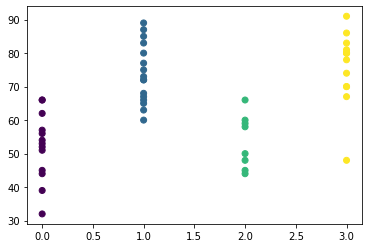

In [30]:
plt.scatter(crime_data.cluster_km,crime_data.UrbanPop,c = crime_data.cluster_km)
plt.show()